In [106]:
import csv
import calplot
import pandas as pd
import matplotlib.pyplot as plt
from imdb import IMDb
from datetime import datetime

In [32]:
# Download loads of information and might take sometime to run

movies_info = {}

ia = IMDb()

with open("export_movies_history.csv", "r") as f:
    movies = csv.DictReader(f)
    for movie in movies:
        date_str = datetime.strptime(movie["watched_at"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime("%Y-%m-%d")
        date = datetime.strptime(date_str, "%Y-%m-%d")
        code = movie["imdb"][2:]
        if code in movies_info:
            movies_info[code]['count'] += 1
        else:
            movies_info[code] = {}
            movies_info[code]['count'] = 1
            movies_info[code]['date'] = date
            imdb_info = ia.get_movie(code)
            movies_info[code]['runtime'] = imdb_info["runtimes"]
            movies_info[code]['genres'] = imdb_info["genres"]

In [41]:
totalTime = 0
genres = {}
for code, info in movies_info.items():
    if info['date'].year != 2020:
        continue
    totalTime += int(info['runtime'][0])
    for g in info["genres"]:
        if g in genres:
            genres[g] += 1
        else:
            genres[g] = 1    

TotalTime spent watching movies:  149 hr


<AxesSubplot:ylabel='Genre'>

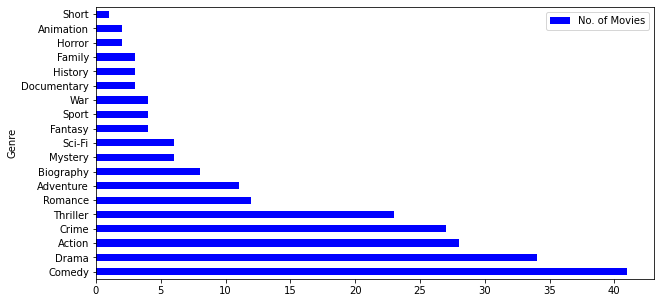

In [110]:
print("TotalTime spent watching movies: ", totalTime//60, "hr")

data = dict(sorted(genres.items(), key=lambda item: item[1], reverse=True))
genre_df = pd.DataFrame(data.items(), columns=["Genre", "No. of Movies"])
genre_df.plot(kind="barh", x=0,y=1, figsize=(10,5), color='blue')

In [82]:
tvShows = {}
dayWiseTV = {}
with open("export_shows_history.csv", "r") as f:
    shows = csv.DictReader(f)
    for show in shows:
        date_str = datetime.strptime(show["watched_at"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime("%Y-%m-%d")
        date = datetime.strptime(date_str, "%Y-%m-%d")
        code = show["imdb"][2:]
        if code in tvShows:
            tvShows[code]["count"] += 1
        else:
            tvShows[code] = {}
            tvShows[code]["count"] = 1
            tvShows[code]["date"] = date_str
            imdb_info = ia.get_movie(code)
            # Some indian shows didn't had these values
            if "runtimes" in imdb_info and "genres" in imdb_info:
                tvShows[code]["runtime"] = imdb_info["runtimes"]
                tvShows[code]["genres"] = imdb_info["genres"]
            else:
                print(code)

        if date in dayWiseTV:
            dayWiseTV[date] += 1
        else:
            dayWiseTV[date] = 1

12624844
10584608
8254592
6328940


In [115]:
totalTvTime = 0
tvGenres = {}
for code, info in tvShows.items():
    if "2020" not in info['date']:
        continue
    if "runtime" in info:
        # Even on imdb the data is bit uneven
        # For some shows the runtime tells you the complete runtime of the show
        # Ex: The Queen's gambit there are 7 episode and total time of 6h 33 min
        #     So runtime for that was 393 instead of 1 episode
        # That is why here if any show have the runtime of more than an hour that
        #  means it the total time and not the time of an episode
        if int(info["runtime"][0]) > 60:
            totalTvTime += int(info["runtime"][0])
        else:
            totalTvTime += (int(info['runtime'][0])*info["count"])
    if "genres" in info:
        for g in info["genres"]:
            if g in tvGenres:
                tvGenres[g] += 1
            else:
                tvGenres[g] = 1  

TotalTime spent watching movies:  498 hr


<AxesSubplot:ylabel='Genre'>

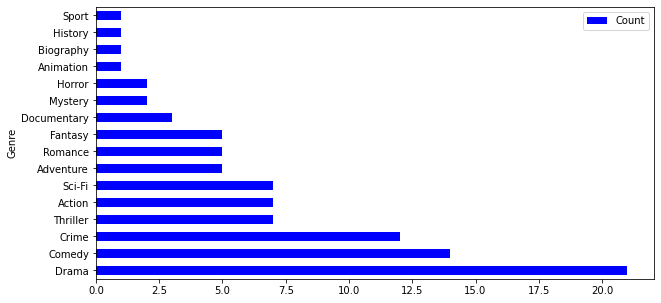

In [116]:
print("TotalTime spent watching movies: ", totalTvTime//60, "hr")

data = dict(sorted(tvGenres.items(), key=lambda item: item[1], reverse=True))
tvgenre_df = pd.DataFrame(data.items(), columns=["Genre", "Count"])
tvgenre_df.plot(kind="barh", x=0,y=1, figsize=(10,5), color='blue')

(<Figure size 900x122.4 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

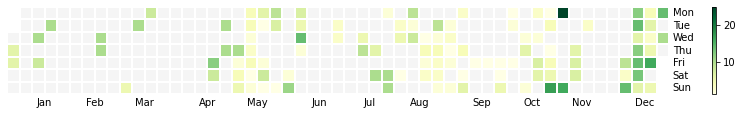

In [117]:
dataToPlot = {}

for k,v in dayWiseTV.items():
    if k.year == 2020:
        dataToPlot[k] = v

series = pd.Series(dataToPlot)
calplot.calplot(series, cmap='YlGn', edgecolor=None, yearlabels=False)